# Predict House Prices Model

> ### Problem Statement

<p style="text-align: justify;">Tujuan utamanya adalah untuk memprediksi nilai rata-rata rumah di berbagai distrik di California dengan menggunakan data sensus tahun 1990. Dataset ini berisi beberapa fitur, termasuk lokasi geografis, karakteristik perumahan, demografi populasi, dan indikator ekonomi. Dengan mengembangkan model prediktif, kami bertujuan untuk memahami faktor-faktor utama yang memengaruhi harga rumah dan memberikan wawasan yang berharga bagi para pemangku kepentingan seperti investor real estat, perencana kota, pembuat kebijakan, dan calon pembeli rumah. </p>

> Goal 

<p style="text-align: justify;">
<ul>
    <li>Memprediksi Harga Rumah: Mengembangkan model regresi untuk memprediksi nilai rata-rata rumah (median_house_value) berdasarkan fitur-fitur seperti garis bujur, garis lintang, usia rata-rata rumah, jumlah kamar, jumlah kamar tidur, jumlah penduduk, jumlah rumah tangga, pendapatan rata-rata, dan kedekatan dengan laut.</li>
    <li>Mengidentifikasi Faktor Kunci: Menganalisis pentingnya berbagai fitur untuk menentukan pendorong utama harga rumah di California.</li>
    <li>Mendukung Pengambilan Keputusan: Memberikan wawasan yang dapat ditindaklanjuti bagi investor real estat, perencana kota, dan pembuat kebijakan untuk membuat keputusan yang tepat terkait dengan pasar perumahan, pembangunan perkotaan, dan keterjangkauan perumahan.</li>
    <li>Memungkinkan perencanaan keuangan dan investasi properti, analisis pasar perumahan, dan membantu calon pembeli dan penjual rumah untuk membuat keputusan yang lebih terinformasi.</li>


</ul>
</p>


> # EDA

In [1]:
# untuk manipulasi data
import pandas as pd
import numpy as np

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# untuk menghitung Variance Inflation Factor (VIF) dalam regresi linear
from statsmodels.stats.outliers_influence import variance_inflation_factor

# untuk normalisasi dan transformasi data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler

# untuk pembagian dataset dan validasi model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold,KFold

# untuk membangun pipeline pemrosesan data dan model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

# untuk model Decision Tree dan visualisasi pohon keputusan
from sklearn.tree import DecisionTreeRegressor, plot_tree





# use memory
from memory_profiler import memory_usage

# untuk mengabaikan peringatan yang tidak diinginkan
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_california = pd.read_csv('dataset/data_california_house.csv')
df_california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


> ## EDA

In [3]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [4]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [5]:
df_california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

> Summary Statistic Descriptive

In [6]:
display(df_california.describe().T,
        df_california.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
longitude,14448.0,-119.566647,2.006587,-124.3500,-121.8000,-118.4900,-118.0000,-114.3100
latitude,14448.0,35.630093,2.140121,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,14448.0,28.618702,12.596694,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,14448.0,2640.132683,2191.612441,2.0000,1451.0000,2125.0000,3148.0000,32627.0000
total_bedrooms,14311.0,538.260709,423.577544,1.0000,295.0000,435.0000,647.0000,6445.0000
population,14448.0,1425.157323,1149.580157,3.0000,784.0000,1165.0000,1724.0000,35682.0000
households,14448.0,499.508929,383.098390,1.0000,279.0000,410.0000,604.0000,6082.0000
median_income,14448.0,3.866667,1.891158,0.4999,2.5706,3.5391,4.7361,15.0001
median_house_value,14448.0,206824.624516,115365.476182,14999.0000,119600.0000,180000.0000,263900.0000,500001.0000


,count,unique,top,freq
ocean_proximity,14448,5,<1H OCEAN,6369


> EDA 1 Histogram Numeric Column

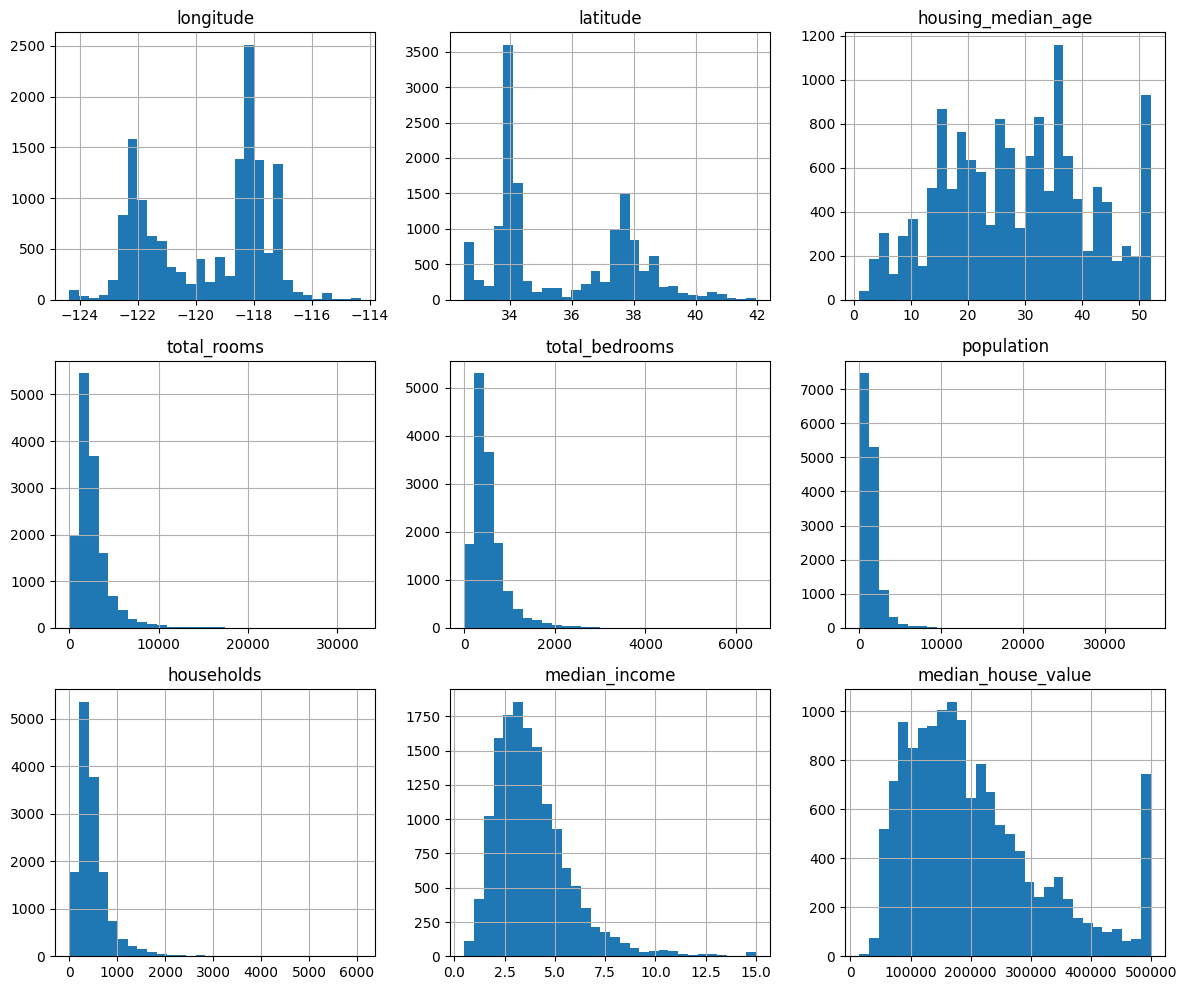

In [7]:
# Histogram from variable Numerik
df_california.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

<p style="text-align: justify;"> 
Pada histogram plot kita dapat mengecualikan grafik longitude dan latitude akan dijadikan kategorikal namun tipe data harus dipertahankan agar dapat menjadi titik koordinat, persebaran data yang terlihat aneh / tidak terdistribusi normal dapat dilihat pada grafik median_house_value(ada lebih dari 600 properti dengan harga $500.001(max value kolom median_house_value) serta pada housing_median_age dimana ada lebih dari 800 properti yang berusia 52 tahun(max value kolom housing_median_age))</p>

> Corelation Metric

In [8]:
corelation = df_california.drop('ocean_proximity', axis=1).corr(method='spearman')
corelation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.879491,-0.159119,0.053617,0.075678,0.135127,0.070564,-0.006842,-0.069389
latitude,-0.879491,1.000000,0.041108,-0.033410,-0.069869,-0.136729,-0.087238,-0.091646,-0.167250
housing_median_age,-0.159119,0.041108,1.000000,-0.363420,-0.314208,-0.288264,-0.289847,-0.148067,0.072069
total_rooms,0.053617,-0.033410,-0.363420,1.000000,0.916249,0.815582,0.907105,0.271127,0.199245
total_bedrooms,0.075678,-0.069869,-0.314208,0.916249,1.000000,0.870014,0.975877,-0.002529,0.081704
population,0.135127,-0.136729,-0.288264,0.815582,0.870014,1.000000,0.902576,0.005163,-0.001653
households,0.070564,-0.087238,-0.289847,0.907105,0.975877,0.902576,1.000000,0.032316,0.108217
median_income,-0.006842,-0.091646,-0.148067,0.271127,-0.002529,0.005163,0.032316,1.000000,0.680296
median_house_value,-0.069389,-0.167250,0.072069,0.199245,0.081704,-0.001653,0.108217,0.680296,1.000000


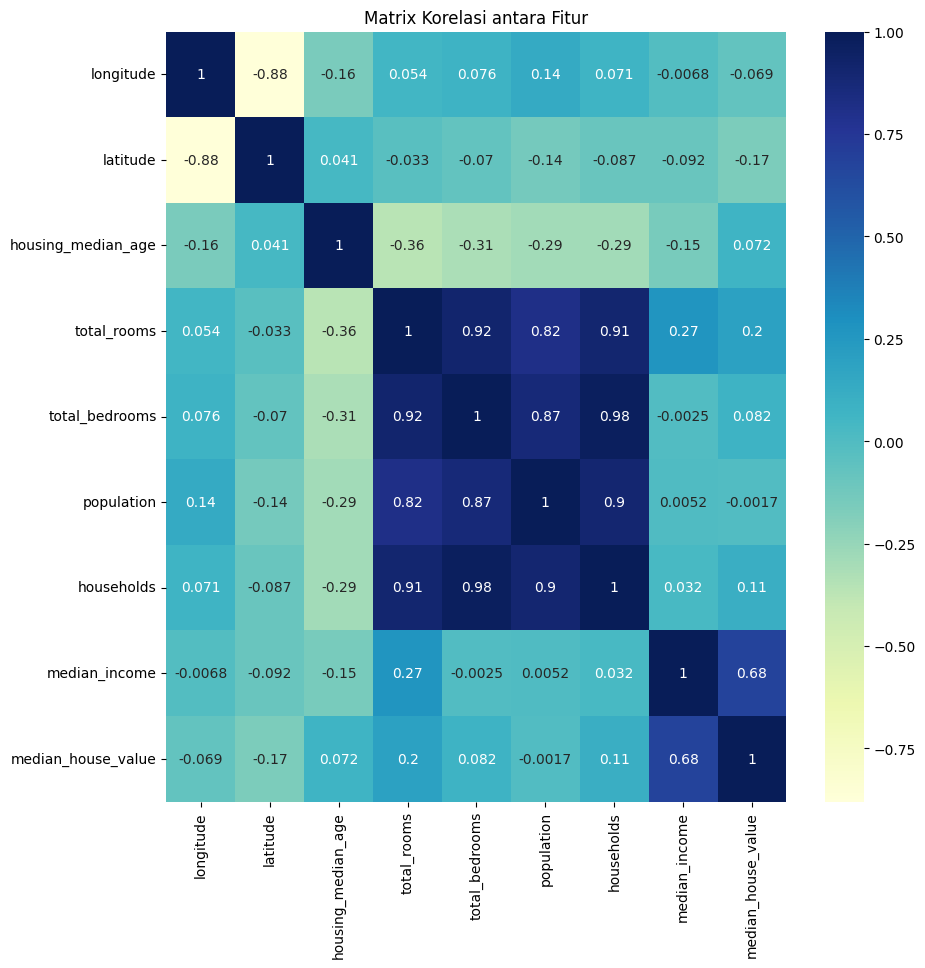

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation,annot=True,cmap='YlGnBu').set_title('Matrix Korelasi antara Fitur')
plt.show()

<p style="text-align: justify;"> 
Pada "Korelasi heatmap" dapat dilihat bahwa korelasi dengan median_house_value yang tertinggi adalah pada median_income. </p>

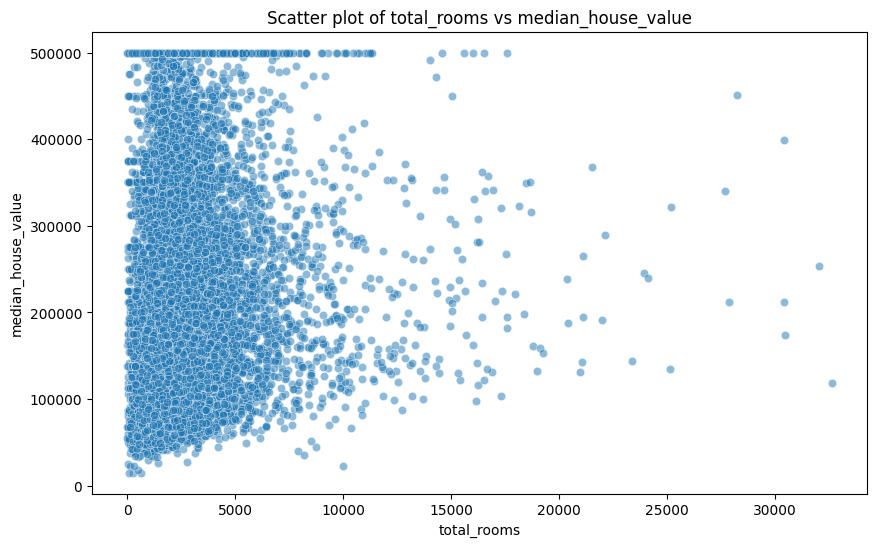

In [10]:
# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rooms', y='median_house_value', data=df_california, alpha=0.5)
plt.title('Scatter plot of total_rooms vs median_house_value')
plt.show()

In [11]:
import matplotlib.image as mpimg

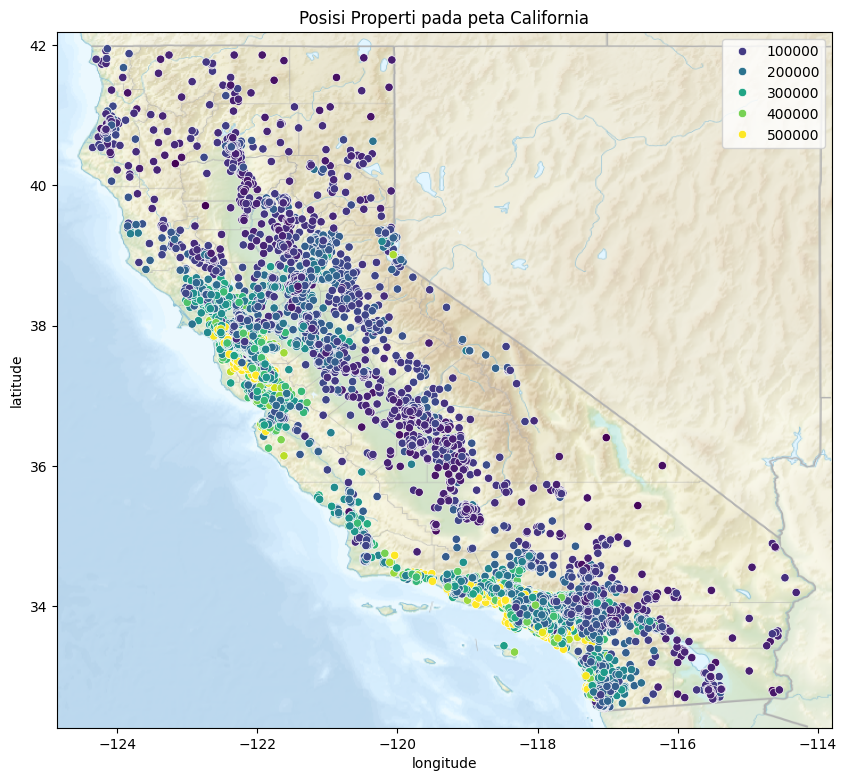

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_california, x="longitude", y="latitude", hue=df_california['median_house_value'],palette='viridis').set_title('Posisi Properti pada peta California')

# Asumsi bahwa 'dataset\california.png' adalah path yang benar ke gambar peta
california = mpimg.imread('dataset\california.png')
plt.imshow(california, extent=[-124.86, -113.8, 32.26, 42.19], alpha=0.5, cmap='jet')

# Menampilkan legenda
plt.legend()

plt.show()


<p style="text-align: justify;"> 
Dapat dilihat bahwa rumah yang ada di ISLAND dan semakin jauh dari pesisir pantai maka akan semakin murah </p>

> ## Data PreProcessing

<p style="text-align: justify;"> 
Setelah data kita breakdown pada EDA, mari kita pre-process data-data nya agar sesuai dengan kebutuhan analisis serta pembuatan model. 
<br>
1. Duplicates
<br>
2. Missing Value
<br>
3. Outliers
 </p>


### Duplicate Data

In [13]:
df_california.duplicated().sum()

0

### Missing Value

In [14]:
df_california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [15]:
df_california['total_bedrooms'].fillna(df_california['total_bedrooms'].median(), inplace=True)

Outlier Data

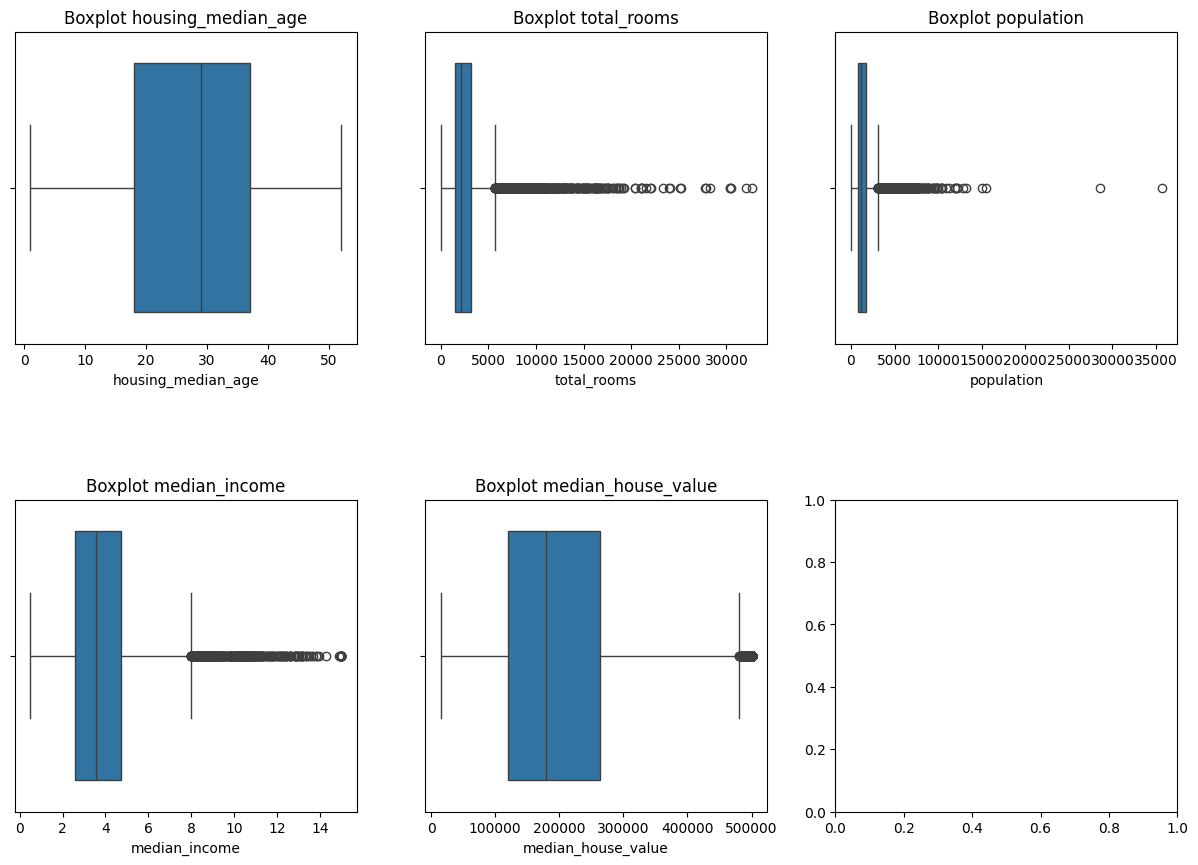

In [16]:
kolom = [ 'housing_median_age', 'total_rooms',
                    'population','median_income', 'median_house_value']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(bottom=0.1, hspace=0.5)

for i, col in enumerate(kolom):
    baris, kolom = divmod(i, 3)
    sns.boxplot(x=df_california[col], ax=axes[baris, kolom])
    axes[baris, kolom].set_title(f'Boxplot {col}')

Outlier yang ada merupakan bagian dari distribusi yang sebenarnya dan mencerminkan variabilitas alami dalam populasi, jika dihapus dapat menghilangkan informasi yang berharga.

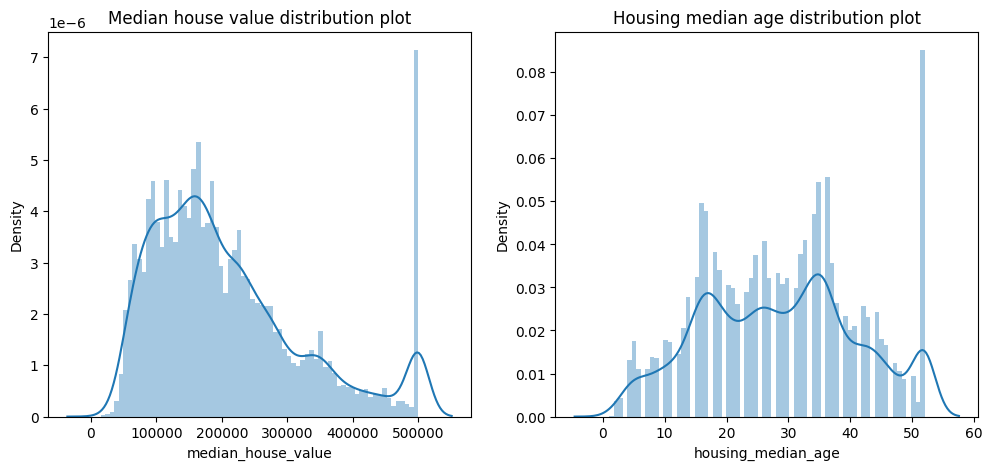

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_california['median_house_value'],kde=True,bins=70).set_title('Median house value distribution plot')
plt.subplot(1,2,2)
sns.distplot(df_california['housing_median_age'],kde=True,bins=70).set_title('Housing median age distribution plot')
plt.show()

Remove Outlier

In [18]:
df_california = df_california.query('median_house_value != 500001.0 and housing_median_age != 52.0')

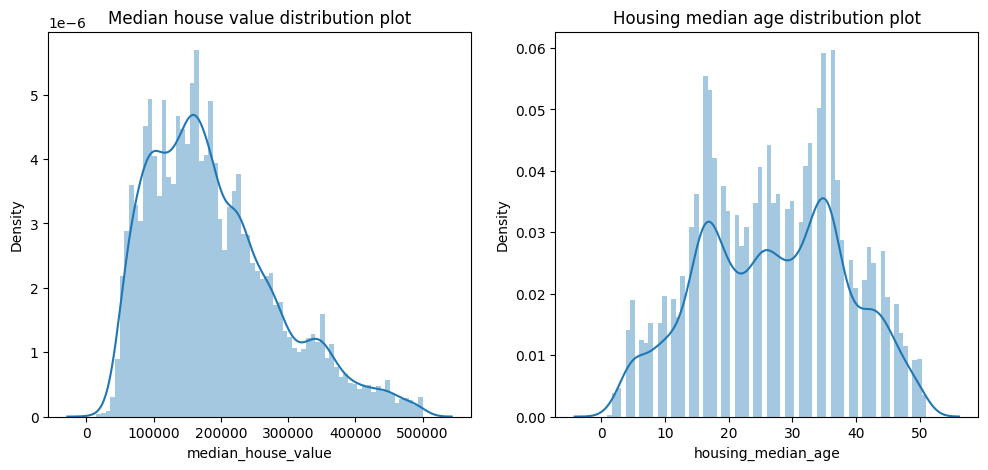

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_california['median_house_value'],kde=True,bins=70).set_title('Median house value distribution plot')
plt.subplot(1,2,2)
sns.distplot(df_california['housing_median_age'],kde=True,bins=70).set_title('Housing median age distribution plot')
plt.show()

<p style="text-align: justify;">Dalam dataset Median_house_value, terdapat 678 data dengan nilai 500.001 yang tidak wajar. Ini kemungkinan merupakan kesalahan pencatatan atau pengumpulan data. Karena nilai tidak akurat,  diputuskan untuk menghapusnya.

Selain itu, pada kolom housing_median_age, ada 896 properti dengan umur 52 tahun. Meskipun ini mungkin benar, ada kecurigaan bahwa rumah yang lebih tua dari 51 tahun dikelompokkan ke dalam kategori ini. Untuk menghindari bias, kami juga menghapus data ini.

Kami juga memutuskan untuk mengubah data rumah berumur 51 tahun menjadi 50 tahun untuk keperluan machine learning agar model lebih sederhana dan konsisten.  </p>

> # Feature Enginering

add new feature 

In [20]:
# df_california['rooms_per_household'] = df_california['total_rooms'] / df_california['households']
# df_california['population_per_household'] = df_california['population'] / df_california['households']
# df_california['bedrooms_per_room'] = df_california['total_bedrooms'] / df_california['total_rooms']
# df_california['income_per_household'] = df_california['median_income'] / df_california['households']

1. informasi tambahan mengenai ketersediaan ruang dalam perumahan. <br>
2. Rasio jumlah penduduk terhadap jumlah rumah tangga dapat memberikan indikasi kepadatan penduduk di suatu area. <br>
3. Rasio jumlah kamar tidur terhadap jumlah kamar total dapat menunjukkan seberapa banyak kamar tidur dibandingkan dengan ruang lain. <br>
4. Pendapatan rata-rata per rumah tangga. Ini memberikan gambaran tentang kekayaan relatif rumah tangga di area tersebut. <br>

> # Model

Data Splitting


In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalisasi data longitude dan latitude
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(df_california[['longitude', 'latitude']])

# Klasterisasi dengan K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Anda bisa mengatur jumlah klaster sesuai kebutuhan
df_california['cluster'] = kmeans.fit_predict(scaled_coordinates)

# Mengubah nilai cluster menjadi nama wilayah yang lebih deskriptif
cluster_mapping = {
    0: 'California Utara',
    1: 'California Tengah',
    2: 'California Selatan',
    3: 'California Barat',
    4: 'California Timur'
}
df_california['cluster'] = df_california['cluster'].map(cluster_mapping)

print(df_california[['longitude', 'latitude', 'cluster']].head())


   longitude  latitude            cluster
1    -122.21     37.77  California Tengah
2    -118.04     33.87   California Utara
3    -118.28     34.06   California Utara
4    -119.81     36.73   California Barat
5    -117.79     33.80   California Utara


In [22]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.image as mpimg

# plt.figure(figsize=(10,10))
# sns.scatterplot(data=df_california, x="longitude", y="latitude", hue=df_california['cluster'],palette='viridis').set_title('Posisi Properti pada peta California')

# # Asumsi bahwa 'dataset\california.png' adalah path yang benar ke gambar peta
# california = mpimg.imread('dataset\california.png')
# plt.imshow(california, extent=[-124.86, -113.8, 32.26, 42.19], alpha=0.5, cmap='jet')

# # Menampilkan legenda
# plt.legend()

# plt.show()


In [23]:
# Memisahkan fitur dan target
feature = df_california.drop(['median_house_value'], axis=1)
target = df_california['median_house_value']


X = feature  
y = target   

>  Split dataset into training+validation and test sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 2020)

> ## Data Transformation

In [25]:
# Membuat daftar kategori lengkap untuk kolom kategorikal
categories = [X['ocean_proximity'].unique().tolist()]

In [26]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13000 entries, 1 to 14447
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13000 non-null  float64
 1   latitude            13000 non-null  float64
 2   housing_median_age  13000 non-null  float64
 3   total_rooms         13000 non-null  float64
 4   total_bedrooms      13000 non-null  float64
 5   population          13000 non-null  float64
 6   households          13000 non-null  float64
 7   median_income       13000 non-null  float64
 8   ocean_proximity     13000 non-null  object 
 9   median_house_value  13000 non-null  float64
 10  cluster             13000 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.2+ MB


In [27]:
# Memisahkan kolom numerik dan kategorikal
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [28]:
categorical_features

['ocean_proximity', 'cluster']

In [29]:
# Membuat daftar kategori lengkap untuk kolom kategorikal
categories = [X['ocean_proximity'].unique().tolist()]

In [30]:
categorical_features

['ocean_proximity', 'cluster']

In [31]:
# Define categorical features and categories
categorical_features = ['ocean_proximity', 'cluster']
categories = [X_train[col].unique().tolist() for col in categorical_features]


In [32]:
# # Define numeric features
# numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# numeric_features.remove('median_house_value')  # Assuming this is the target variable


In [33]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13000 entries, 1 to 14447
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13000 non-null  float64
 1   latitude            13000 non-null  float64
 2   housing_median_age  13000 non-null  float64
 3   total_rooms         13000 non-null  float64
 4   total_bedrooms      13000 non-null  float64
 5   population          13000 non-null  float64
 6   households          13000 non-null  float64
 7   median_income       13000 non-null  float64
 8   ocean_proximity     13000 non-null  object 
 9   median_house_value  13000 non-null  float64
 10  cluster             13000 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.2+ MB


In [34]:
# Pipeline untuk numerik
numeric_encoder_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Transformer untuk preprocessing
transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity', 'cluster']),
    ('num', numeric_encoder_pipeline, numeric_features)
], remainder='passthrough')

In [35]:
# Fit and transform the data
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [36]:
# Convert the transformed data to a DataFrame for easier analysis
transformed_feature_names = (
    transformer.named_transformers_['onehot']
    .get_feature_names_out(categorical_features)
    .tolist() + numeric_features
)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_feature_names)
X_train_transformed_df

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,cluster_California Selatan,cluster_California Tengah,cluster_California Timur,cluster_California Utara,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.067039,0.010638,-0.052632,-0.343876,-0.633636,-0.396304,-0.524096,0.968337
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.810056,0.997340,-1.000000,0.269695,-0.030705,-0.046201,-0.069277,0.882676
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.949721,0.827128,0.315789,-0.655549,-0.692254,-0.272074,-0.605422,0.297730
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.966480,1.007979,-1.157895,-0.344451,-0.195394,-0.170431,-0.132530,0.066378
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.550279,-0.111702,-1.052632,4.569293,5.699930,5.206366,5.057229,-0.498413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.296089,0.635638,0.368421,-0.413456,-0.480112,-0.189938,-0.454819,-0.609414
10396,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.438547,-0.125000,-1.157895,1.125359,0.898814,0.524641,0.906627,-0.444391
10397,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.318436,0.691489,-0.736842,2.286371,1.183531,1.303901,1.078313,0.974394
10398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.033520,-0.085106,0.421053,-0.700978,-0.675506,-0.578029,-0.605422,0.349621


In [37]:
# # Fit and transform the data
# X_train_transformed = transformer.fit_transform(X_train)
# X_test_transformed = transformer.transform(X_test)

# # Convert the transformed data to a DataFrame for easier analysis
# transformed_feature_names = (
#     transformer.named_transformers_['onehot']
#     .get_feature_names_out(categorical_features)
#     .tolist() + numeric_features
# )

In [38]:
# X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_feature_names)
# X_train_transformed_df

In [39]:
# Calculate the correlation matrix
correlation_matrix = X_train_transformed_df.corr()
correlation_matrix

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,cluster_California Selatan,cluster_California Tengah,cluster_California Timur,cluster_California Utara,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
ocean_proximity_INLAND,1.000000,-0.007031,-0.219334,-0.273367,0.399495,-0.090916,-0.063044,-0.295831,-0.084075,0.376203,-0.226627,0.038983,0.000521,-0.026560,-0.036639,-0.228322
ocean_proximity_ISLAND,-0.007031,1.000000,-0.003000,-0.003739,-0.003403,-0.005704,-0.003573,0.011229,0.004891,-0.009781,0.001766,-0.008620,-0.007593,-0.008895,-0.008403,-0.006829
ocean_proximity_NEAR BAY,-0.219334,-0.003000,1.000000,-0.116640,-0.106171,0.525954,-0.111471,-0.267168,-0.424054,0.317314,0.139277,-0.006468,-0.008802,-0.040207,0.000022,0.061912
ocean_proximity_NEAR OCEAN,-0.273367,-0.003739,-0.116640,1.000000,-0.074509,-0.017068,0.370211,-0.170910,0.050588,-0.166560,0.043062,-0.012377,-0.000422,-0.025996,0.002846,0.004405
cluster_California Selatan,0.399495,-0.003403,-0.106171,-0.074509,1.000000,-0.201863,-0.126461,-0.303096,-0.397557,0.598323,-0.103360,-0.007127,-0.024553,-0.075611,-0.040945,-0.150933
cluster_California Tengah,-0.090916,-0.005704,0.525954,-0.017068,-0.201863,1.000000,-0.211940,-0.507969,-0.721713,0.566986,0.052429,-0.012289,-0.036796,-0.048250,-0.023082,0.132989
cluster_California Timur,-0.063044,-0.003573,-0.111471,0.370211,-0.126461,-0.211940,1.000000,-0.318227,0.465474,-0.422206,-0.176914,0.097233,0.096318,0.040504,0.066670,-0.033285
cluster_California Utara,-0.295831,0.011229,-0.267168,-0.170910,-0.303096,-0.507969,-0.318227,1.000000,0.599250,-0.633545,0.172063,-0.020209,0.017521,0.087960,0.036050,0.085231
longitude,-0.084075,0.004891,-0.424054,0.050588,-0.397557,-0.721713,0.465474,0.599250,1.000000,-0.923099,-0.044171,0.049172,0.076067,0.100709,0.060483,-0.011521
latitude,0.376203,-0.009781,0.317314,-0.166560,0.598323,0.566986,-0.422206,-0.633545,-0.923099,1.000000,-0.043423,-0.037386,-0.072215,-0.115887,-0.077621,-0.079502


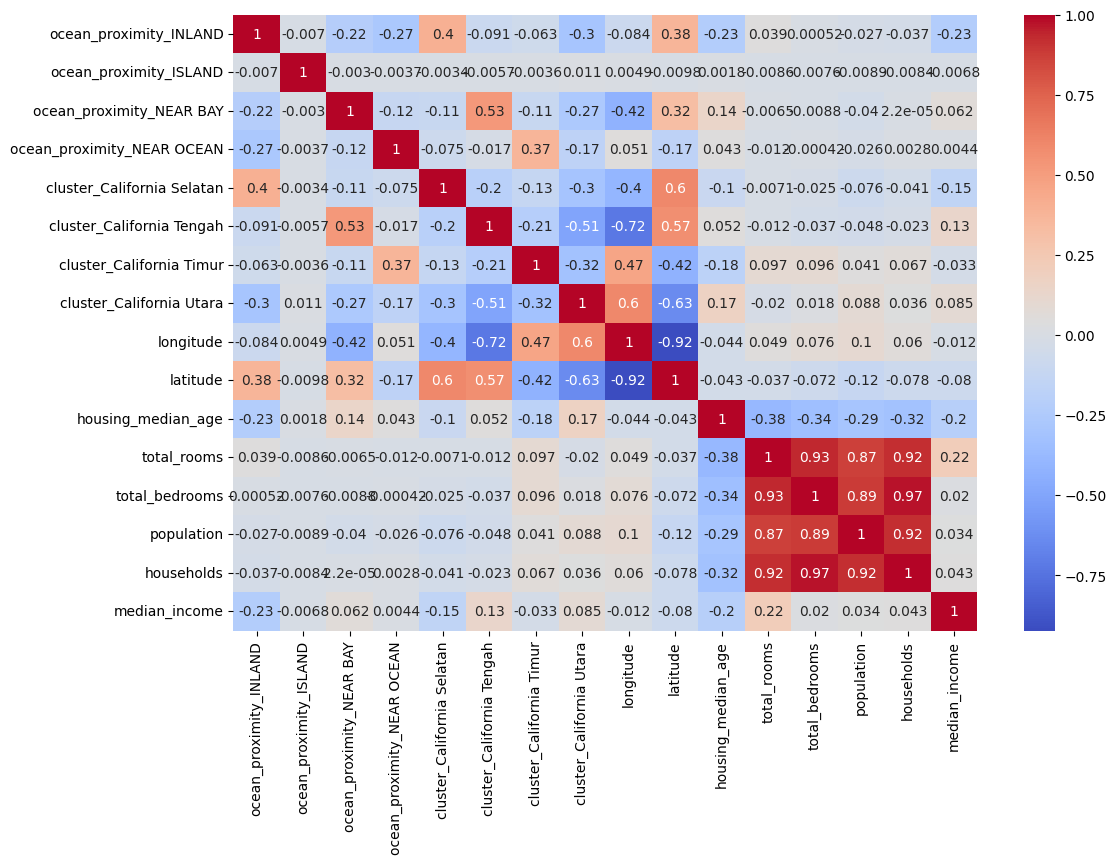

In [40]:
# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

> Model

In [41]:
# untuk model Knn
from sklearn.neighbors import KNeighborsRegressor

# untuk model Random Forest
from sklearn.ensemble import RandomForestRegressor

# untuk model XGBoost
from xgboost import XGBRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# untuk evaluasi model regresi
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, r2_score


In [42]:
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb = XGBRegressor(random_state=2020)
# baru
gbr = GradientBoostingRegressor(random_state=2020)
abr = AdaBoostRegressor(random_state=2020)

In [43]:
# Model dictionary
models = {
    "KNN": knn,
    "Decision Tree": tree,
    "Random Forest": rf,
    "XGBoost": xgb,
    "Gradient Boosting": gbr,
    "AdaBoost": abr
}

# Create custom scorers for MAPE and R2
scorers = {
    'mape': make_scorer(mean_absolute_percentage_error, greater_is_better=True),
    'r2': make_scorer(r2_score)
}

# Initialize results lists
model_name = []
mape_mean_value = []
mape_std_value = []
r2_mean_value = []
r2_std_value = []
memory_usage_list = []

# Define memory_usage function if not already defined
import psutil

def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # in MB

# Train and evaluate each model
for name, model in models.items():

    kf = KFold(n_splits=5, shuffle=True, random_state=2020)
    
    estimator = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])
    
    mem_usage_before = memory_usage()  # Memory usage before training
    
    # Evaluate model with cross-validation for MAPE and R2
    cv_results = cross_validate(
        estimator,
        X_train,
        y_train,
        cv=kf,
        scoring=scorers,
        error_score='raise',
        return_train_score=False
    )
    
    mem_usage_after = memory_usage()  # Memory usage after training
    mem_usage = mem_usage_after - mem_usage_before  # Memory usage difference
    
    # Store results
    model_name.append(name)
    mape_mean_value.append(cv_results['test_mape'].mean())
    mape_std_value.append(cv_results['test_mape'].std())
    r2_mean_value.append(cv_results['test_r2'].mean())
    r2_std_value.append(cv_results['test_r2'].std())
    memory_usage_list.append(mem_usage)
    
    # print(f"{name} - MAPE: {cv_results['test_mape']}, R2: {cv_results['test_r2']}")

# Create DataFrame
results_df = pd.DataFrame({
    'Model': model_name,
    'Mean MAPE': mape_mean_value,
    'Std MAPE': mape_std_value,
    'Mean R2': r2_mean_value,
    'Std R2': r2_std_value,
    'Memory Usage (MB)': memory_usage_list
})

print(results_df)

               Model  Mean MAPE  Std MAPE   Mean R2    Std R2  \
0                KNN   0.222735  0.005330  0.664488  0.009221   
1      Decision Tree   0.249219  0.011184  0.564192  0.032526   
2      Random Forest   0.186287  0.006158  0.766886  0.015234   
3            XGBoost   0.180248  0.005311  0.779806  0.011358   
4  Gradient Boosting   0.212450  0.005272  0.725974  0.016455   
5           AdaBoost   0.456859  0.040072  0.399693  0.056814   
6           CatBoost   0.171499  0.005586  0.801582  0.010864   

   Memory Usage (MB)  
0           1.277344  
1           3.449219  
2         -20.046875  
3           5.476562  
4          -1.945312  
5           3.347656  
6           6.960938  


In [44]:
# Create benchmark_model_train DataFrame
benchmark_model = pd.DataFrame({
    'model': model_name, 
    'mean_mape': mape_mean_value,
    'std_mape': mape_std_value,
    'mean_r2': r2_mean_value,
    'std_r2': r2_std_value
}).sort_values(by='mean_r2', ascending=False)

print(benchmark_model)

               model  mean_mape  std_mape   mean_r2    std_r2
6           CatBoost   0.171499  0.005586  0.801582  0.010864
3            XGBoost   0.180248  0.005311  0.779806  0.011358
2      Random Forest   0.186287  0.006158  0.766886  0.015234
4  Gradient Boosting   0.212450  0.005272  0.725974  0.016455
0                KNN   0.222735  0.005330  0.664488  0.009221
1      Decision Tree   0.249219  0.011184  0.564192  0.032526
5           AdaBoost   0.456859  0.040072  0.399693  0.056814


In [45]:
# Initialize results lists for test set evaluation
model_name = []
test_mape = []
test_r2 = []

models = {
    "Random Forest": rf,
    "XGBoost": xgb,
    "Gradient Boosting": gbr,
    "CatBoost": cbr
}

# Evaluate each model on the test set
for name, model in models.items():
    model_pipeline = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])
    

    
    # Fit the model
    model_pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_test = model_pipeline.predict(X_test)
    
    # Evaluate
    mape = mean_absolute_percentage_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    
    # Store results
    test_mape.append(mape)
    test_r2.append(r2)
    model_name.append(name)

In [46]:
# Create DataFrame for test set evaluation results
test_results_df = pd.DataFrame({
    'Model': model_name,
    'Test MAPE': test_mape,
    'Test R2': test_r2
}).sort_values(by='Test R2', ascending=False)

print(test_results_df)

               Model  Test MAPE   Test R2
3           CatBoost   0.162706  0.809126
1            XGBoost   0.169635  0.793836
0      Random Forest   0.173667  0.776609
2  Gradient Boosting   0.202412  0.730182


>  Hyperparameter tuning Random Forest

In [47]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=2020)
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

estimator_rf = Pipeline([
    ('transformer', transformer),
    ('model', rf)
])

grid_search_rf = GridSearchCV(
    estimator=estimator_rf,
    param_grid=param_grid_rf,
    cv=kf,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

In [48]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Best cross-validation score for Random Forest: {grid_search_rf.best_score_}')

best_rf = grid_search_rf.best_estimator_

Best parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Best cross-validation score for Random Forest: 0.767736725950089


>  Hyperparameter tuning XGBoost

In [ ]:
# Define the model
xgb = XGBRegressor(random_state=2020)

# Define the hyperparameter grid
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

# Create the pipeline
estimator_xgb = Pipeline([
    ('transformer', transformer),
    ('model', xgb)
])

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=estimator_xgb,
    param_grid=param_grid_xgb,
    cv=kf,
    scoring='r2',
    n_jobs=-1
)

In [ ]:
# Fit the model
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['ocean_proximity']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['longitu...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=2020, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200, 300],
                         'model__subsample': [0.8, 1.0]},
             scoring='r2')

In [ ]:
# Print the best parameters and the best cross-validation score
print(f'Best parameters for XGBoost: {grid_search_xgb.best_params_}')
print(f'Best cross-validation score for XGBoost: {grid_search_xgb.best_score_}')

# Get the best estimator
best_xgb = grid_search_xgb.best_estimator_

Best parameters for XGBoost: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__subsample': 1.0}
Best cross-validation score for XGBoost: 0.7975953947657116


In [ ]:
models = {
    "Random Forest": rf,
    "XGBoost": xgb
}

# Evaluate each model on the test set
for name, model in models.items():
    print(model)

RandomForestRegressor(random_state=2020)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=2020, ...)


> Before Tunning

In [ ]:
models = {
    "Random Forest": rf,
    "XGBoost": xgb
}

model_name = []
score_mape = []
score_r2 = []
# Evaluate each model on the test set
for name, model in models.items():
    model_pipeline = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])
    model_pipeline.fit(X_train,y_train)
    y_pred = model_pipeline.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # add data
    model_name.append(name)
    score_mape.append(mape)
    score_r2.append(r2)
    
before_tunning = pd.DataFrame({
    'Model Name' : model_name,
    'MAPE' : score_mape,
    'R2' : score_r2
})

before_tunning



,Model Name,MAPE,R2
0,Random Forest,0.174231,0.775370
1,XGBoost,0.169607,0.788346


> After Tunning

In [ ]:
xgb_after_tn = grid_search_xgb.best_estimator_
rf_after_tn = grid_search_rf.best_estimator_

models = {
    "Random Forest": rf_after_tn,
    "XGBoost": xgb_after_tn
}

model_name = []
score_mape = []
score_r2 = []

# Evaluate each model on the test set
for name, model in models.items():
    model.fit(X_train, y_train)  # No need to create another Pipeline here
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # add data
    model_name.append(name)
    score_mape.append(mape)
    score_r2.append(r2)
    
after_tuning = pd.DataFrame({
    'Model Name': model_name,
    'MAPE': score_mape,
    'R2': score_r2
})

after_tuning


,Model Name,MAPE,R2
0,Random Forest,0.172688,0.777056
1,XGBoost,0.159932,0.808921


[Text(0.5, 0, 'median_house_value'),
 Text(0, 0.5, 'residual'),
 Text(0.5, 1.0, 'Residual value')]

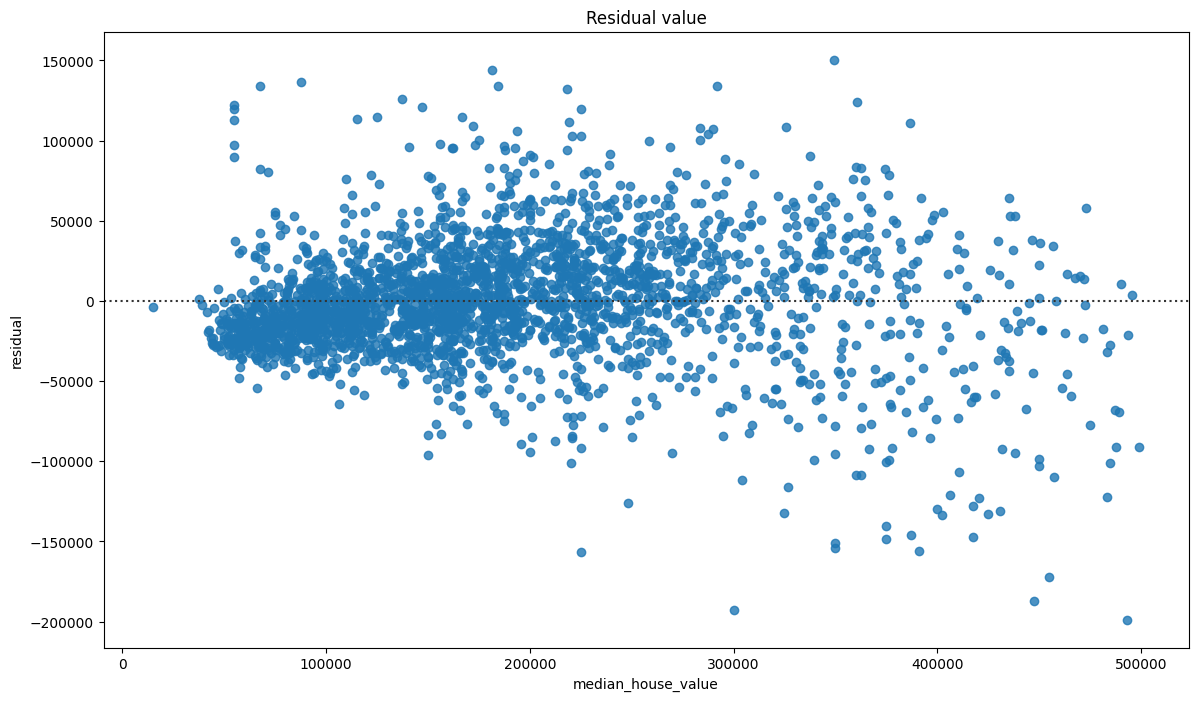

In [ ]:
y_pred_xgb_tunning = xgb_after_tn.predict(X_test)
plt.figure(figsize=(14, 8))
sns.residplot(x=y_test, y=y_pred_xgb_tunning).set(xlabel='median_house_value', ylabel='residual',title = 'Residual value')

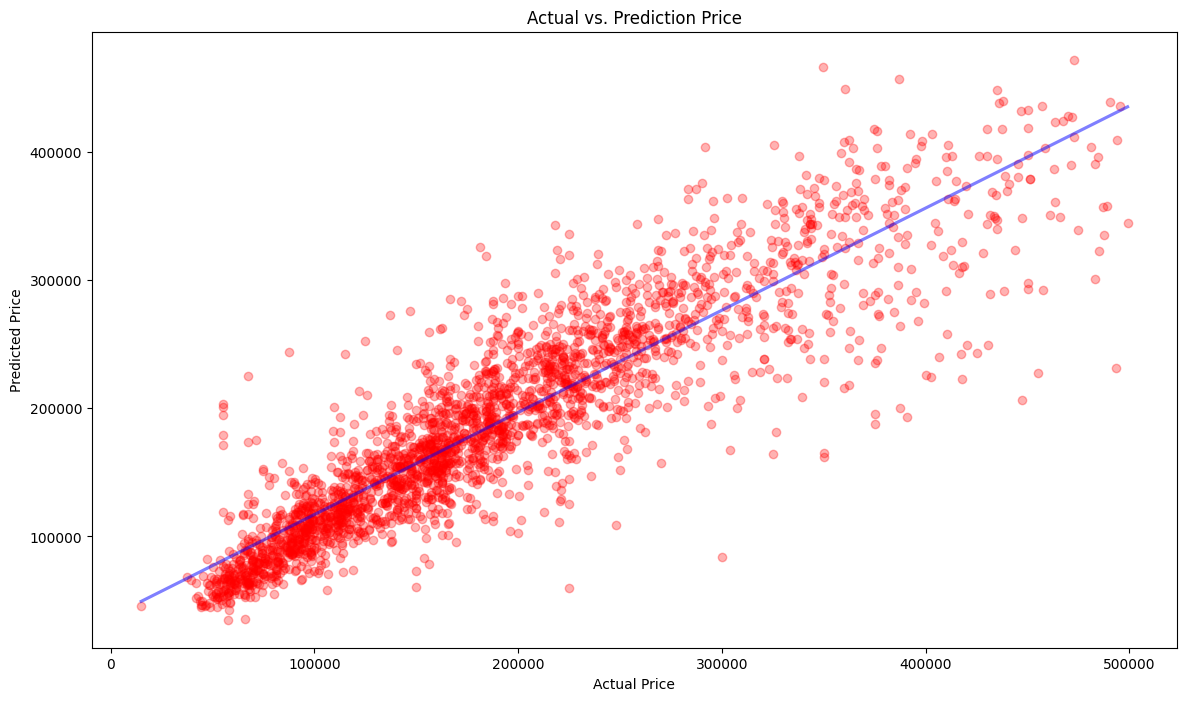

In [ ]:
plt.figure(figsize=(14, 8))
sns.regplot(x=y_test, y=y_pred_xgb_tunning, ci=None, scatter_kws = {'color': 'red', 'alpha': 0.3}, line_kws = {'color': 'blue', 'alpha': 0.5}).set(title='Actual vs. Prediction Price',
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price')

plt.show()

In [ ]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');